### Introduction 

Hello! We are 

1. Sankar Samiksha
2. Shreejaa Saravanan 
3. Kanupriya 

from BMS1. 

In this lab, we will describe how we combined merge sort and insertion sort. The flow of this presentation is as follows:

---

Shreeja will be explaining.....

Kanupriya will be explaining.... 

Person one: Introduction, Importing libraries, implementation of merge sort, insertion sort, hybrid sort (part a) --> must explain the code, explain why we put the key comparisons there for hybrid look at the comments it is in the markdown as well. 

Person two: Part b, why we chose the value for x, why is it the largest. What range for the array sizes, the correctness of the code 

---

Samiksha will be explaining the time complexity of the hybrid, Part (c) and Part (d)


#### Importing required libraries 

To start off, we have imported the following libraries. Numpy is used to create the arrays. Numpy alongside matplotlib is used to create the graphs needed for part (c). The time module is used to keep track of CPU time required in Part (d). The math module is used to calculate the key comparisons for each size of the array. 

We have done hand calculations to match that calculated by python. 

In [1]:
# For the drawing of the graphs
import numpy as np
import matplotlib.pyplot as plt

#To keep track of time for the sorting algorithms
import time

# For calculations of Key Comparisons using python 
import math

# Part (a) Implementation of all the algorithms 

**merge_sort()** <br>
MergeSort uses the Divide and Conquer concept. The MergeSort function repeatedly divides the array into two halves until we reach a stage where we try to perform MergeSort on a subarray of size 1.

**insertion_sort()** <br>
Insertion Sort is an intuitive, primitve sorting method. It is a form of insertion into an ordered list. This is not a recursive function like MergeSort. 

In [2]:
#Merge sort function
def merge_sort (A):
    keycomp = 0 
    if len(A) >1:
        mid = len(A)//2 #Finding the middle point of the array
        L=A[:mid]  #Dividing the array elements into two halves
        R=A[mid:]
        keycomp += merge_sort(L)  #Sorting the first half and adding the key comparisons done there
        keycomp += merge_sort(R)  #Sorting the second half and adding the key comparisons done there
        i=j=k=0
        while i < len(L) and j < len(R):  # Copying data to temp arrays L[] and R[]
            if L[i] < R[j]:
                keycomp +=1 #key comparisons are done here as well, this would include the else statement 
                A[k] = L[i]
                i += 1
            else:
                A[k] = R[j]
                j += 1
            k += 1
        while i < len(L):   # Checking if any element was left
            A[k] = L[i]
            i += 1
            k += 1
  
        while j < len(R):
            A[k] = R[j]
            j += 1
            k += 1
    return keycomp


In [3]:
#insertion sort function
def insertion_sort(arr):
    keycomp = 0
    for i in range(1, len(arr)):
            curr = arr[i]
            j = i-1 #set j to equal the index below the current index
            while curr < arr[j] and j>=0: #while  the current index is lesser than its left neighbour and not at start of array
                keycomp += 1
                arr[j+1] = arr[j] #shift the larger number upwards
                j -=1 
            keycomp +=1 #the last and final comparison 
            arr[j+1] = curr #insert the current value that was in focus into the empty slot 
    return keycomp



# Part (a) Algorithm Implementation


**hybrid_sort()** <br>
In mergesort, when the sizes of the subarrays are small, the overhead of many recursive calls makes the algorithm inefficient. 
Therefore, mergesort was combined with insertion sort. 

`The idea is to set a small integer S as a threshold for  the size of subarrays. Once the size of a subarray in a recursive call of mergesort is less than or equal to S, the algorithm with switch to insertion sort, which is efficient for a small-sized input.`  ~ Taken from project 1 manual 

In the below code, there is a demarcation between the insertion sort and the mergesort. Furthermore, documentation is provided to explain the code for both the insertion sort as well as the merge sort. Let us look at the code further. 

Additionally, in this code, the total keycomparisons is counted similar to that done earlier in merge sort. 

Here, `S` is the threshold for the size of subarrays. 

In [4]:

def hybrid_sort(S, arr):
    keycomp = 0


#------------------------------------------------------INSERTION SORT------------------------------------------
    if len(arr)<=S:
        for i in range(1, len(arr)):
            curr = arr[i]
            j = i-1 #set j to equal the index below the current index
            while curr < arr[j] and j>=0: #while  the current index is lesser than its left neighbour and not at start of array
                keycomp += 1
                arr[j+1] = arr[j] #shift the larger number upwards
                j -=1 
            keycomp +=1 #have the include the last comparison where curr > arr[j]
            arr[j+1] = curr #insert the current value that was in focus into the empty slot 
            


#-------------------------------------------------------MERGE SORT-----------------------------------------------
    if len(arr)>S: # if the length of the array is more than S we conduct merge sort
        mid = len(arr)//2 #floor division to find the integer index of the middle element 
        leftarr = arr[:mid] #take all the elements to the left of the middle element
        rightarr = arr[mid:] #take all the elements to the right of the middle element 

        #-----------------------------------------RECURSION------------------------------------------------------
        keycomp += hybrid_sort(S, leftarr) #call the recursive function in the left portion of the array

        keycomp += hybrid_sort(S, rightarr) #call the recursive function in the right portion of the array 

        counter_l = 0
        counter_r = 0
        counter_arr = 0
        
        #----------------------------------------------MERGING--------------------------------------------------
        #traversal through both the list left and right such that the length of left and right has to be more than the counter 
        while len(leftarr)>counter_l and len(rightarr)>counter_r:
            """
            if the element in right array is more than the element in the left array, 
            we insert the element in the left array into the orginial array
            else, we insert the element in the right array into the original array 
            """ 
            if leftarr[counter_l] < rightarr[counter_r]:
                keycomp += 1
                arr[counter_arr] = leftarr[counter_l]
                counter_l += 1
            else:
                arr[counter_arr] = rightarr[counter_r]
                counter_r += 1
            
            counter_arr += 1


        #then add all elements of the left if there is any left
        while len(leftarr) > counter_l:
            arr[counter_arr] = leftarr[counter_l]
            counter_l += 1
            counter_arr += 1

        #then add all elements of the right if there is any left
        while len(rightarr) > counter_r:
            arr[counter_arr] = rightarr[counter_r]
            counter_r += 1
            counter_arr += 1
    return keycomp


# Part (b) and Helper functions

**print_array** <br>
This function is to help to print the Arrays whenever there is a need check correctedness of the sorting algorithms. 

**create_array** <br>
This function is to help conduct `part (b)` of project 1. 

`Generate arrays of increasing sizes, in a range from 1000 to 10million. For each of the sizes, generate a random dataset of integers in the range of [1......x], where x is the largest number you allow for your datasets` ~ Taken from Lab 1 Manual 

In the create_array function, we have **distinct** values in the array. Since the largest size array is 10M, the range has to be larger than 10M. Hence we chose 100M as the range to allow enough room to create the array for the 10M sized array. Hence, our x value which is the `largest number you allow for your dataset` is 100M. 

We have utilized the Numpy library to help us create the array. The `replace=False` allows us to have distinct and unique values in our array. The `size=(1, size)` creates a 2D array in the form [[1,2,3]]. Hence, we need to choose the 0th index to change it to a 1D array. This is done by the `newarr[0]` code. Finally, we convert numpy array to a python list using `tolist()`. 

In [5]:
# printArray function to check if the sorting algorithms are working
def print_array(arr):
    for i in range(len(arr)):
        print(arr[i], end = " ")
    print()

def create_array(size):
    newarr = np.random.choice(np.arange(1, 100000000), replace=False, size=(1, size))
    newarr = newarr[0]
    newarr = newarr.tolist()
    return newarr

Before we move on, it is important to understand how we calculate the timing. The operating system being used for this project is the 64-bit Windows Operating System. 

So in that case we have two options:

1. `time.perf_counter()`: Return the value (in fractional seconds) of a performance counter, i.e. a clock with the highest available resolution to measure a short duration. It does include time elapsed during sleep and is system-wide. The reference point of the returned value is undefined, so that only the difference between the results of two calls is valid.
2. `time.process_time()`: Return the value (in fractional seconds) of the sum of the system and user CPU time of the current process. It does not include time elapsed during sleep. It is process-wide by definition. The reference point of the returned value is undefined, so that only the difference between the results of two calls is valid.

The above definitions are taken from the official time module documentation provided by python. https://docs.python.org/3/library/time.html 


Since the Lab Project description requires us compare performance using **CPU times on the dataset with 10 million integers**, we will be using `time.process_time()` for any and all time complexity analysis from here. 

In [6]:
starttime = time.process_time()
size_1K = create_array(1000)
print("Total Time: ", (time.process_time()-starttime), "1K array created....")


starttime = time.process_time()
size_10K = create_array(10000)
print("Total Time: ", (time.process_time()-starttime), "10K array created....")

starttime = time.process_time()
size_100K = create_array(100000)
print("Total Time: ", (time.process_time()-starttime), "100K array created.....")

starttime = time.process_time()
size_1M = create_array(1000000)
print("Total Time: ", (time.process_time()-starttime), "1M array created.....")


starttime = time.process_time()
size_10M = create_array(10000000)
print("Total Time: ", (time.process_time()-starttime), "10M array created.....")


Total Time:  9.4375 1K array created....
Total Time:  9.171875 10K array created....
Total Time:  9.25 100K array created.....
Total Time:  9.234375 1M array created.....
Total Time:  9.609375 10M array created.....


### Checking the correctness of each sorting algorithm

It is important to check the correctness of each sorting algorithm by using a small sized array before moving on. This is an important step as if this is wrong, the subsequent analysis would be based on the wrong algorithm which is not good! As you can see for the cells below, we see the unsorted array as well as the sorted array. This means the algorithm is correct. 

**merge_sort()**

In [7]:
# to check the correctness a small array size is used
arr = create_array(10)
print_array(arr)
merge_sort(arr)
print_array (arr)

22277717 20879084 26672958 54802812 36174163 41262133 1510069 15565356 56024301 69708737 
1510069 15565356 20879084 22277717 26672958 36174163 41262133 54802812 56024301 69708737 


**insertion_sort()**

In [8]:
samplearr = np.random.choice(np.arange(1, 11), replace=False, size=(1, 10))
samplearr = samplearr[0]
samplearr = samplearr.tolist()
print_array(samplearr)
insertion_sort(samplearr) #a random value is chosen as S just to check the correctness
print_array(samplearr)

6 9 8 4 1 2 7 10 5 3 
1 2 3 4 5 6 7 8 9 10 


**hybrid_sort()**

In [9]:
#to check the correctness a small array size is used 
samplearr = np.random.choice(np.arange(1, 11), replace=False, size=(1, 10))
samplearr = samplearr[0]
samplearr = samplearr.tolist()
print_array(samplearr)
hybrid_sort(5, samplearr) #a random value is chosen as S just to check the correctness
print_array(samplearr)

3 7 8 6 5 4 10 1 2 9 
1 2 3 4 5 6 7 8 9 10 


# Time Complexity 
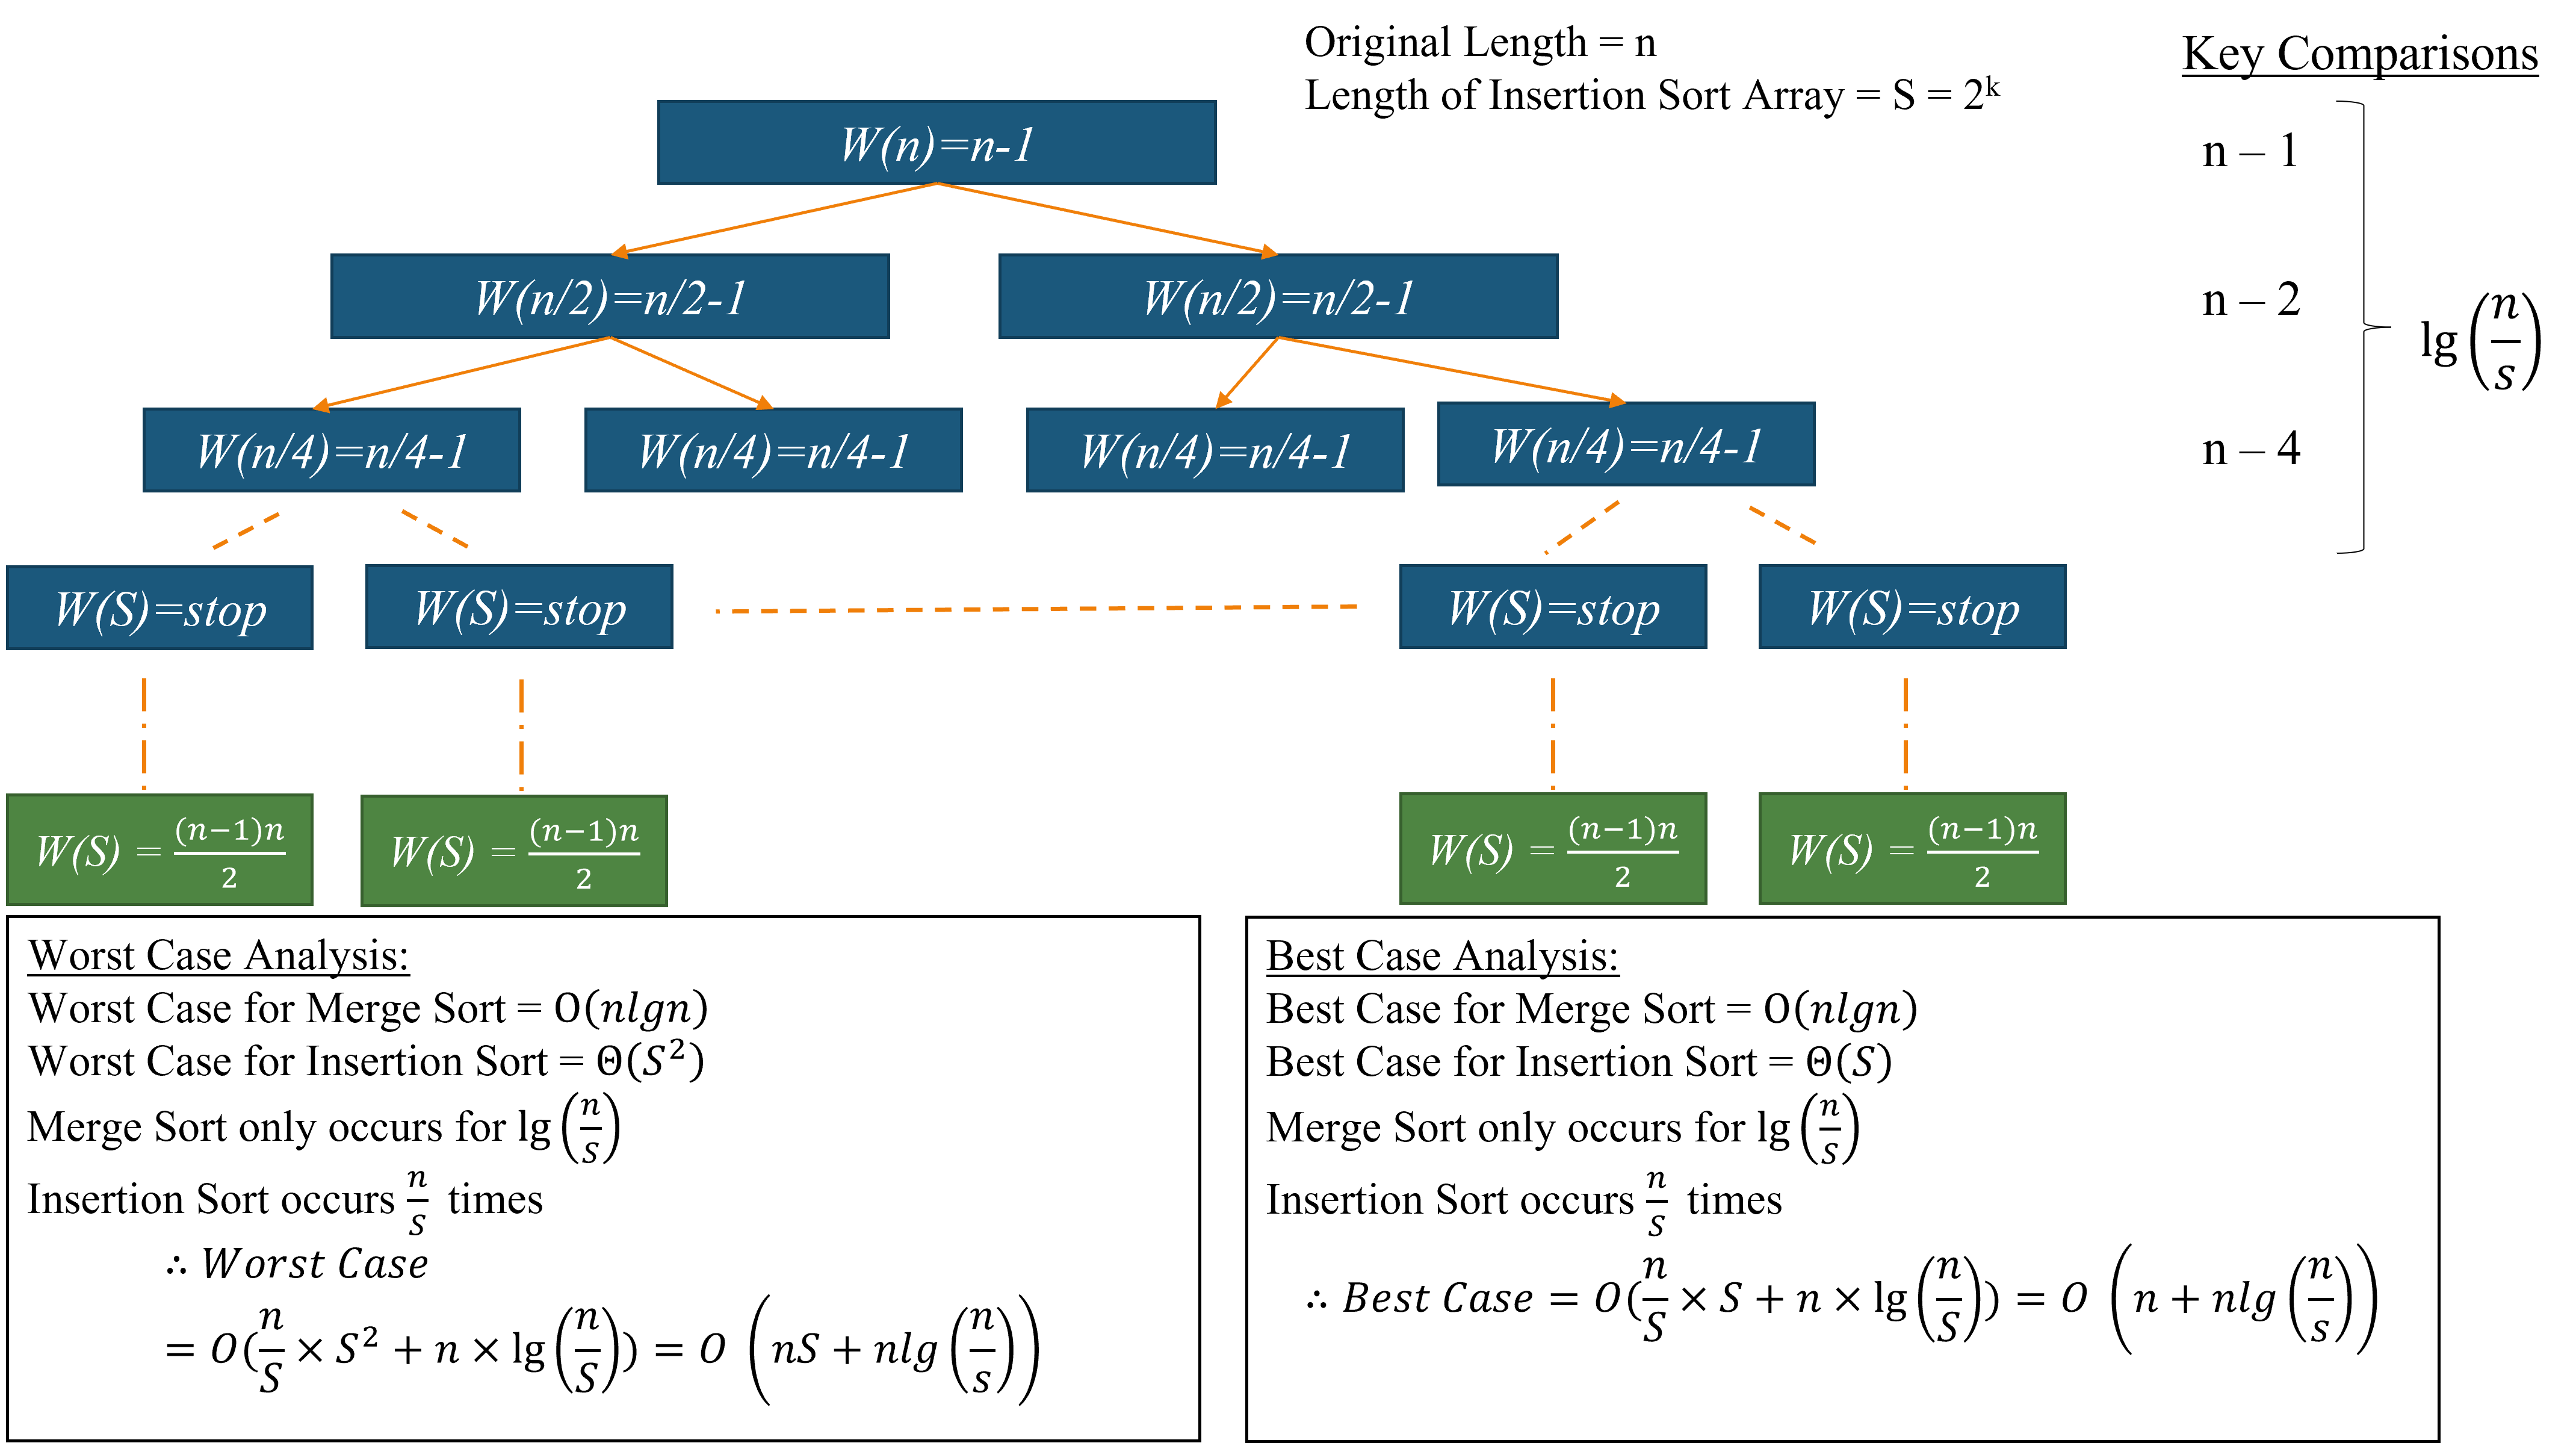

The above diagram describes the theoretical analysis of the time complexity. Further details can be found in the GitHub page. 

# Part (c) (i) 
In this section, the hybrid sort is run on the dataset generated in `Part (b)`.


`With a value of S fixed, plot the number of key comparisons over different sizes of the input list n. Compare your empirical results with your theoretical analysis of the time complexity.` ~Taken from Lab 1 Manual

Given that the smallest array size here is 1000, we can have S take the value of **512**. 

Also, we have made a **copy** of the earlier created arrays. This is to maintain a "control". For fair comparison between the different sorting algorithms and different values of S, we need to use the same unsorted array. For example, the below are array with size 10. 

9 3 4 5 6 1 2 7 8 10

10 9 8 7 6 5 4 3 2 1 

Both the above arrays will give different key comparisons. Hence when we change S or the sorting algorithm, we will not know which factor is the determining factor for the changes in CPU time and actual key comparisons. This is important for **empirical analysis**


In [10]:
myDict = {}

myDict["1K"] = size_1K.copy()
myDict["10K"] = size_10K.copy()
myDict["100K"] = size_100K.copy()
myDict["1M"] = size_1M.copy()
myDict["10M"] = size_10M.copy()
keyArr = []
WorstArr = []
AvArr = []
timearr = []
S=512

for myArr in myDict.values():
    print("Length of Array: ", len(myArr))
    
    #Start CPU time 
    starttime = time.process_time()
    keycomp = hybrid_sort(S, myArr)
    totaltime=time.process_time()-starttime #end CPU time
    print("Total Time: ", (totaltime))
    timearr.append(totaltime)
    
    #append the actual key comparisons to an array for later use
    keyArr.append(keycomp//1000)
    print("Actual Key Comparisons: ", keycomp)
    
    #The theoretical calculation for each size of array 
    n = len(myArr)
    print("Theoretical key comparisons for Hybrid Sorts of N = ", n)
    keycomp = (n*S + n*(math.log(n/S, 10)))
    WorstArr.append(keycomp//1000)
    print("Theoretical Worst Key comp: ", keycomp) #worst key comparison possible
    
    keycomp = (n + n*(math.log(n/S, 10)))
    AvArr.append(keycomp//1000)
    print("Theoretical Average Key comp: ", keycomp) #best key comparison possible 
    print("---------------------------------------")
    

Length of Array:  1000
Total Time:  0.015625
Actual Key Comparisons:  130609
Theoretical key comparisons for Hybrid Sorts of N =  1000
Theoretical Worst Key comp:  512290.73003902414
Theoretical Average Key comp:  1290.7300390241692
---------------------------------------
Length of Array:  10000
Total Time:  0.171875
Actual Key Comparisons:  812502
Theoretical key comparisons for Hybrid Sorts of N =  10000
Theoretical Worst Key comp:  5132907.300390242
Theoretical Average Key comp:  22907.30039024169
---------------------------------------
Length of Array:  100000
Total Time:  2.09375
Actual Key Comparisons:  10235361
Theoretical key comparisons for Hybrid Sorts of N =  100000
Theoretical Worst Key comp:  51429073.00390242
Theoretical Average Key comp:  329073.0039024169
---------------------------------------
Length of Array:  1000000
Total Time:  26.625
Actual Key Comparisons:  128313895
Theoretical key comparisons for Hybrid Sorts of N =  1000000
Theoretical Worst Key comp:  5152907

**For information** <br>

208seconds approx. 3.5min

However, it should be noted that it can take longer. 

In [11]:
print("Array of Key Comp: ", keyArr)
print("Array of Worst Key Comp: ", WorstArr)
print("Array of Average Key Comp: ", AvArr)

Array of Key Comp:  [130, 812, 10235, 128313, 845418]
Array of Worst Key Comp:  [512.0, 5132.0, 51429.0, 515290.0, 5162907.0]
Array of Average Key Comp:  [1.0, 22.0, 329.0, 4290.0, 52907.0]


**Compare your empirical results with your theoretical analysis of the time complexity.**
The number of key comparisons for the graph only is divided by 1000 for better clarity in the graph. 

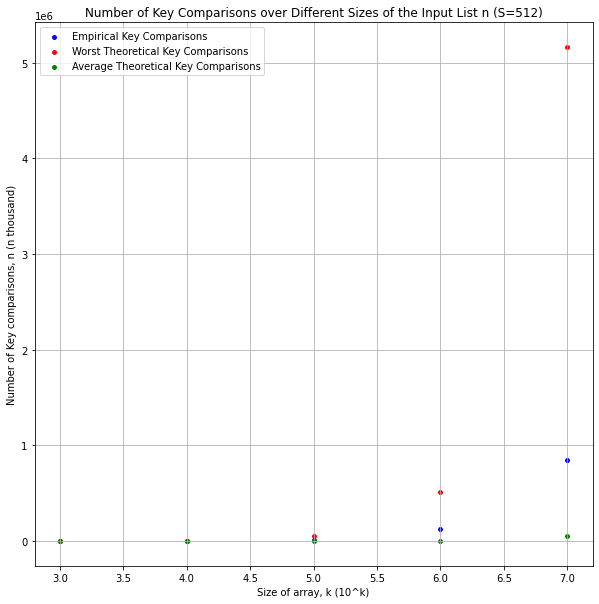

In [12]:
#we do it by 10^k
sizeArr = [3, 4, 5, 6, 7]

fig, ax = plt.subplots(figsize = (10, 10))
scale = 15

plt.title("Number of Key Comparisons over Different Sizes of the Input List n (S=512)")
plt.xlabel("Size of array, k (10^k)")
plt.ylabel("Number of Key comparisons, n (n thousand)")
ax.scatter(sizeArr, keyArr, c='blue', label='Empirical Key Comparisons', s=scale)
ax.scatter(sizeArr, WorstArr, c='red', label='Worst Theoretical Key Comparisons', s=scale)
ax.scatter(sizeArr, AvArr, c='green', label='Average Theoretical Key Comparisons', s=scale)

ax.legend()
ax.grid(True)

plt.show()

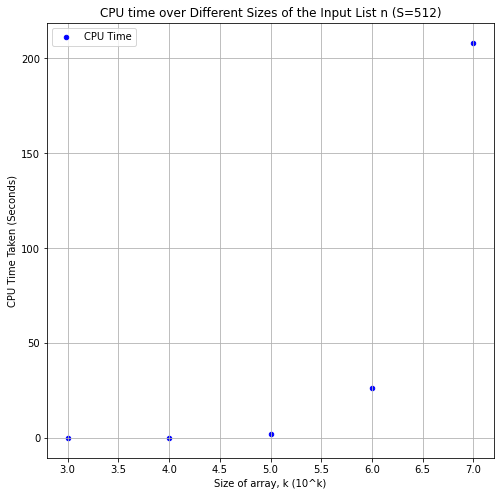

In [13]:
sizeArr = [3, 4, 5, 6, 7]

fig, ax = plt.subplots(figsize=(8,8))
scale = 20.0
plt.title("CPU time over Different Sizes of the Input List n (S=512)")
plt.xlabel("Size of array, k (10^k)")
plt.ylabel("CPU Time Taken (Seconds)")
ax.scatter(sizeArr, timearr, c='blue', label='CPU Time', s=scale)


ax.legend()
ax.grid(True)

plt.show()

# Part (c) (ii)
In this section, the hybrid sort is run on the dataset generated in `Part (b)`. `With the input size n fixed, plot the number of key comparisons over different values of S`


Taking the fixed input size as 10K, S will be in the form 2<sup>k</sup>, where the range will be from 2 to 2<sup>10</sup>.

From part (c) (i), it suggests that S=512 is not really that great with the 10M sized array. 

For this part, we chose 100K as it is big enough for us to see a time difference but not as large as the 1M or 10M that would take too long. 

In [14]:
#re-initialize the array 
keyArr = []
WorstArr = []
AvArr = []
timearr =[]

for k in range(1, 11):
    myArr = size_100K.copy()
    S = 2**k
    print("Length of Array: ", len(myArr))
    print("Length of S: ", S)
    #Start CPU time 
    starttime = time.process_time()
    keycomp = hybrid_sort(S, myArr)
    totaltime=time.process_time()-starttime #end CPU time
    print("Total Time: ", (totaltime))
    timearr.append(totaltime)
    
    #append the actual key comparisons to an array for later use
    keyArr.append(keycomp//1000)
    print("Actual Key Comparisons: ", keycomp)
    
    #The theoretical calculation for each size of array 
    n = len(myArr)
    print("Theoretical key comparisons for Hybrid Sorts of N = ", n)
    keycomp = (n*S + n*(math.log(n/S, 10)))
    WorstArr.append(keycomp//1000)
    print("Theoretical Worst Key comp: ", keycomp) #worst key comparison possible
    
    keycomp = (n + n*(math.log(n/S, 10)))
    AvArr.append(keycomp//1000)
    print("Theoretical Average Key comp: ", keycomp) #best key comparison possible 
    print("---------------------------------------")
    
    

Length of Array:  100000
Length of S:  2
Total Time:  0.640625
Actual Key Comparisons:  793941
Theoretical key comparisons for Hybrid Sorts of N =  100000
Theoretical Worst Key comp:  669897.0004336019
Theoretical Average Key comp:  569897.0004336019
---------------------------------------
Length of Array:  100000
Length of S:  4
Total Time:  0.5625
Actual Key Comparisons:  838075
Theoretical key comparisons for Hybrid Sorts of N =  100000
Theoretical Worst Key comp:  839794.0008672038
Theoretical Average Key comp:  539794.0008672038
---------------------------------------
Length of Array:  100000
Length of S:  8
Total Time:  0.53125
Actual Key Comparisons:  894044
Theoretical key comparisons for Hybrid Sorts of N =  100000
Theoretical Worst Key comp:  1209691.0013008057
Theoretical Average Key comp:  509691.0013008056
---------------------------------------
Length of Array:  100000
Length of S:  16
Total Time:  0.53125
Actual Key Comparisons:  1013149
Theoretical key comparisons for H

In [15]:
print("Array of Key Comp: ", keyArr)
print("Array of Worst Key Comp: ", WorstArr)
print("Array of Average Key Comp: ", AvArr)
print("Array of CPU Time: ", timearr)

Array of Key Comp:  [793, 838, 894, 1013, 1276, 1837, 3011, 5402, 10235, 19932]
Array of Worst Key Comp:  [669.0, 839.0, 1209.0, 1979.0, 3549.0, 6719.0, 13089.0, 25859.0, 51429.0, 102598.0]
Array of Average Key Comp:  [569.0, 539.0, 509.0, 479.0, 449.0, 419.0, 389.0, 359.0, 329.0, 298.0]
Array of CPU Time:  [0.640625, 0.5625, 0.53125, 0.53125, 0.546875, 0.625, 0.84375, 1.296875, 2.15625, 4.0625]


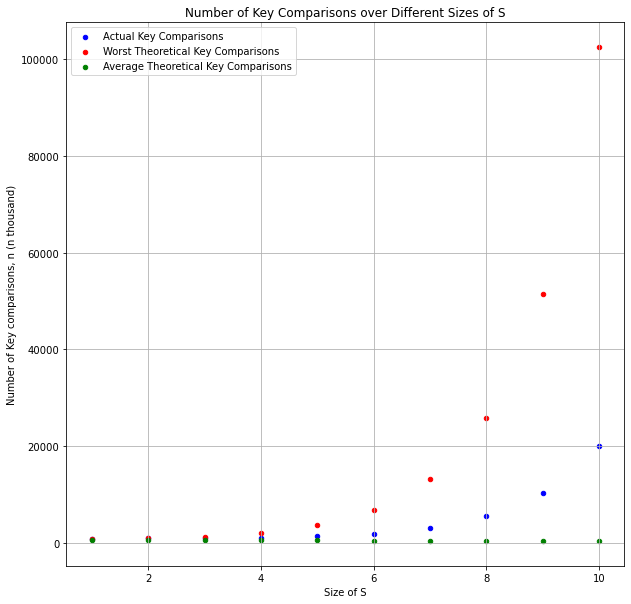

In [16]:
#we do it by 10^k
sizeArr = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

fig, ax = plt.subplots(figsize=(10,10))
scale = 20.0
plt.title("Number of Key Comparisons over Different Sizes of S")
plt.xlabel("Size of S")
plt.ylabel("Number of Key comparisons, n (n thousand)")
ax.scatter(sizeArr, keyArr, c='blue', label='Actual Key Comparisons', s=scale)
ax.scatter(sizeArr, WorstArr, c='red', label='Worst Theoretical Key Comparisons', s=scale)
ax.scatter(sizeArr, AvArr, c='green', label='Average Theoretical Key Comparisons', s=scale)

ax.legend()
ax.grid(True)

plt.show()

From the above graph, we can see the blue dots lying between the worst time complexity and the average time complexity. We would want to choose based on two criteria:

1. Shortest CPU time possible 
2. The blue dot (Empirical) that lies as close to the green dot (average/best time complexity)

Now let us see the CPU time

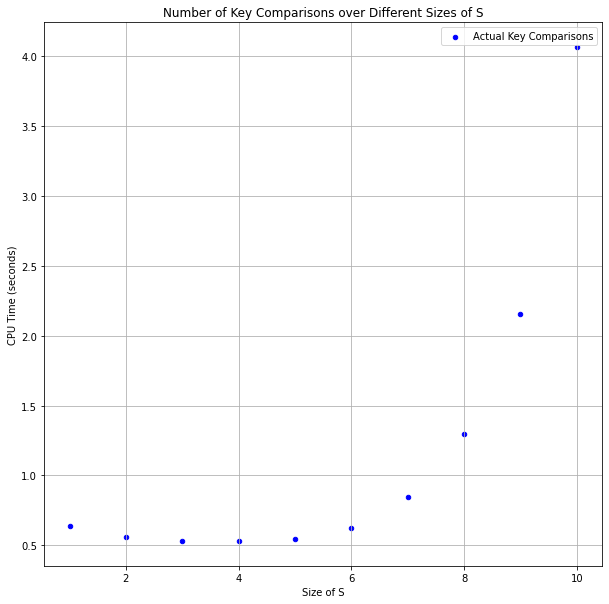

In [17]:
sizeArr = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

fig, ax = plt.subplots(figsize = (10,10))
scale = 20.0
plt.title("Number of Key Comparisons over Different Sizes of S")
plt.xlabel("Size of S")
plt.ylabel("CPU Time (seconds)")
ax.scatter(sizeArr, timearr, c='blue', label='Actual Key Comparisons', s=scale)

ax.legend()
ax.grid(True)

plt.show()

# Part (c) (iii)
`Using different sizes of input datasets, study how to determine an optimal value of S for the best performance of this hybrid algorithm`


Let's look at the graph above that we got in part (c) (ii). As you can see the minimum occurs at S=2<sup>4</sup> = 16. This means the optimum lies between 8 and 32. We **cannot** say that the best is 16 because the graph step size is too big. Hence, we run more S values with step size 1 from 8 to 32. 

This leads us to part (c) (iii). 

Let's run!

In [18]:
#re-initialize the array 
keyArr = []
WorstArr = []
AvArr = []
timearr =[]
S=8
while S<32:
    myArr = size_100K.copy()
    S += 1
    print("Length of S: ", S)
    
    #Start CPU time 
    starttime = time.process_time()
    keycomp = hybrid_sort(S, myArr)
    totaltime=time.process_time()-starttime #end CPU time
    print("Total Time: ", (totaltime))
    timearr.append(totaltime)
    
    #append the actual key comparisons to an array for later use
    keyArr.append(keycomp//1000)
    print("Actual Key Comparisons: ", keycomp)
    
    #The theoretical calculation for each size of array 
    n = len(myArr)
    print("Theoretical key comparisons for Hybrid Sorts of N = ", n)
    keycomp = (n*S + n*(math.log(n/S, 10)))
    WorstArr.append(keycomp//1000)
    print("Theoretical Worst Key comp: ", keycomp) #worst key comparison possible
    
    keycomp = (n + n*(math.log(n/S, 10)))
    AvArr.append(keycomp//1000)
    print("Theoretical Average Key comp: ", keycomp) #best key comparison possible 
    print("---------------------------------------")
    
    

Length of S:  9
Total Time:  0.546875
Actual Key Comparisons:  894044
Theoretical key comparisons for Hybrid Sorts of N =  100000
Theoretical Worst Key comp:  1304575.7490560676
Theoretical Average Key comp:  504575.7490560675
---------------------------------------
Length of S:  10
Total Time:  0.546875
Actual Key Comparisons:  894044
Theoretical key comparisons for Hybrid Sorts of N =  100000
Theoretical Worst Key comp:  1400000.0
Theoretical Average Key comp:  500000.0
---------------------------------------
Length of S:  11
Total Time:  0.546875
Actual Key Comparisons:  894044
Theoretical key comparisons for Hybrid Sorts of N =  100000
Theoretical Worst Key comp:  1495860.7314841775
Theoretical Average Key comp:  495860.73148417746
---------------------------------------
Length of S:  12
Total Time:  0.53125
Actual Key Comparisons:  984948
Theoretical key comparisons for Hybrid Sorts of N =  100000
Theoretical Worst Key comp:  1592081.8753952375
Theoretical Average Key comp:  49208

In [19]:
print("Array of Key Comp: ", keyArr)
print("Array of Worst Key Comp: ", WorstArr)
print("Array of Average Key Comp: ", AvArr)
print("Array of CPU Time: ", timearr)

Array of Key Comp:  [894, 894, 894, 984, 1013, 1013, 1013, 1013, 1013, 1013, 1013, 1013, 1013, 1013, 1013, 1161, 1276, 1276, 1276, 1276, 1276, 1276, 1276, 1276]
Array of Worst Key Comp:  [1304.0, 1400.0, 1495.0, 1592.0, 1688.0, 1785.0, 1882.0, 1979.0, 2076.0, 2174.0, 2272.0, 2369.0, 2467.0, 2565.0, 2663.0, 2761.0, 2860.0, 2958.0, 3056.0, 3155.0, 3253.0, 3352.0, 3450.0, 3549.0]
Array of Average Key Comp:  [504.0, 500.0, 495.0, 492.0, 488.0, 485.0, 482.0, 479.0, 476.0, 474.0, 472.0, 469.0, 467.0, 465.0, 463.0, 461.0, 460.0, 458.0, 456.0, 455.0, 453.0, 452.0, 450.0, 449.0]
Array of CPU Time:  [0.546875, 0.546875, 0.546875, 0.53125, 0.53125, 0.53125, 0.53125, 0.546875, 0.53125, 0.546875, 0.578125, 0.5625, 0.53125, 0.515625, 0.546875, 0.53125, 0.546875, 0.546875, 0.59375, 0.546875, 0.546875, 0.546875, 0.53125, 0.546875]


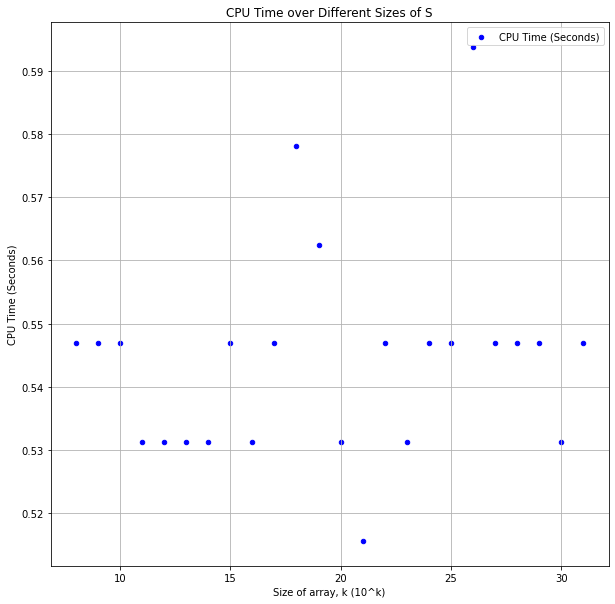

In [20]:
sizeArr = list(range(8, 32))

fig, ax = plt.subplots(figsize = (10,10))
scale = 20.0
plt.title("CPU Time over Different Sizes of S")
plt.xlabel("Size of array, k (10^k)")
plt.ylabel("CPU Time (Seconds)")
ax.scatter(sizeArr, timearr, c='blue', label='CPU Time (Seconds)', s=scale)

ax.legend()
ax.grid(True)

plt.show()

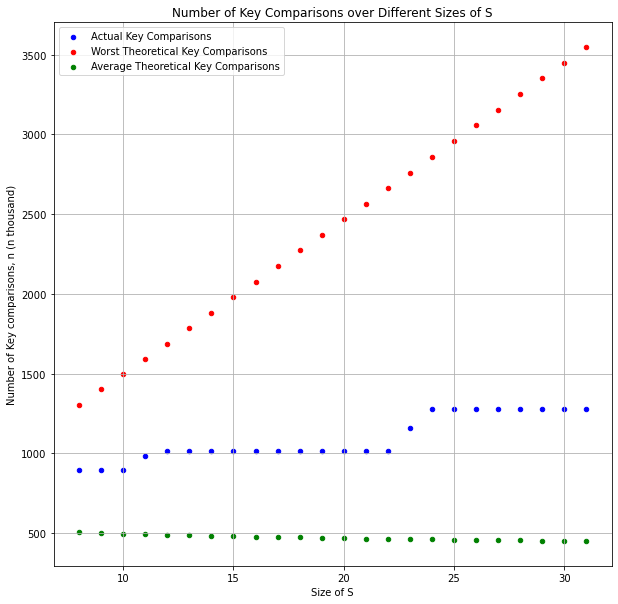

In [21]:
#we do it by 10^k
sizeArr = list(range(8, 32))

fig, ax = plt.subplots(figsize=(10,10))
scale = 20.0
plt.title("Number of Key Comparisons over Different Sizes of S")
plt.xlabel("Size of S")
plt.ylabel("Number of Key comparisons, n (n thousand)")
ax.scatter(sizeArr, keyArr, c='blue', label='Actual Key Comparisons', s=scale)
ax.scatter(sizeArr, WorstArr, c='red', label='Worst Theoretical Key Comparisons', s=scale)
ax.scatter(sizeArr, AvArr, c='green', label='Average Theoretical Key Comparisons', s=scale)

ax.legend()
ax.grid(True)

plt.show()

# Part (c) (iii) Further Exploration

So it seems that as the array size increases, there is lower tolerance for the value of S. After multiple runs of the above cells, we came to the conclusion that we should explore S=10, 11 17, 22, 23

In [22]:
myDict = {}

myDict["1K"] = size_1K.copy()
myDict["10K"] = size_10K.copy()
myDict["1M"] = size_1M.copy()
keyArr = []
WorstArr = []
AvArr = []
timearr = []
S=10

for myArr in myDict.values():
    print("Length of Array: ", len(myArr))
    
    #Start CPU time 
    starttime = time.process_time()
    keycomp = hybrid_sort(S, myArr)
    totaltime=time.process_time()-starttime #end CPU time
    print("Total Time: ", (totaltime))
    timearr.append(totaltime)
    
    #append the actual key comparisons to an array for later use
    keyArr.append(keycomp//1000)
    print("Actual Key Comparisons: ", keycomp)
    
    #The theoretical calculation for each size of array 
    n = len(myArr)
    print("Theoretical key comparisons for Hybrid Sorts of N = ", n)
    keycomp = (n*S + n*(math.log(n/S, 10)))
    WorstArr.append(keycomp//1000)
    print("Theoretical Worst Key comp: ", keycomp) #worst key comparison possible
    
    keycomp = (n + n*(math.log(n/S, 10)))
    AvArr.append(keycomp//1000)
    print("Theoretical Average Key comp: ", keycomp) #best key comparison possible 
    print("---------------------------------------")
    
    

Length of Array:  1000
Total Time:  0.015625
Actual Key Comparisons:  6046
Theoretical key comparisons for Hybrid Sorts of N =  1000
Theoretical Worst Key comp:  12000.0
Theoretical Average Key comp:  3000.0
---------------------------------------
Length of Array:  10000
Total Time:  0.03125
Actual Key Comparisons:  79840
Theoretical key comparisons for Hybrid Sorts of N =  10000
Theoretical Worst Key comp:  130000.0
Theoretical Average Key comp:  40000.0
---------------------------------------
Length of Array:  1000000
Total Time:  6.9375
Actual Key Comparisons:  10878188
Theoretical key comparisons for Hybrid Sorts of N =  1000000
Theoretical Worst Key comp:  15000000.0
Theoretical Average Key comp:  6000000.0
---------------------------------------


In [23]:
myDict = {}

myDict["1K"] = size_1K.copy()
myDict["10K"] = size_10K.copy()
myDict["1M"] = size_1M.copy()
keyArr = []
WorstArr = []
AvArr = []
timearr = []
S=11

for myArr in myDict.values():
    print("Length of Array: ", len(myArr))
    
    #Start CPU time 
    starttime = time.process_time()
    keycomp = hybrid_sort(S, myArr)
    totaltime=time.process_time()-starttime #end CPU time
    print("Total Time: ", (totaltime))
    timearr.append(totaltime)
    
    #append the actual key comparisons to an array for later use
    keyArr.append(keycomp//1000)
    print("Actual Key Comparisons: ", keycomp)
    
    #The theoretical calculation for each size of array 
    n = len(myArr)
    print("Theoretical key comparisons for Hybrid Sorts of N = ", n)
    keycomp = (n*S + n*(math.log(n/S, 10)))
    WorstArr.append(keycomp//1000)
    print("Theoretical Worst Key comp: ", keycomp) #worst key comparison possible
    
    keycomp = (n + n*(math.log(n/S, 10)))
    AvArr.append(keycomp//1000)
    print("Theoretical Average Key comp: ", keycomp) #best key comparison possible 
    print("---------------------------------------")
    
    

Length of Array:  1000
Total Time:  0.0
Actual Key Comparisons:  6046
Theoretical key comparisons for Hybrid Sorts of N =  1000
Theoretical Worst Key comp:  12958.607314841774
Theoretical Average Key comp:  2958.6073148417745
---------------------------------------
Length of Array:  10000
Total Time:  0.046875
Actual Key Comparisons:  79840
Theoretical key comparisons for Hybrid Sorts of N =  10000
Theoretical Worst Key comp:  139586.07314841775
Theoretical Average Key comp:  39586.073148417745
---------------------------------------
Length of Array:  1000000
Total Time:  6.84375
Actual Key Comparisons:  10878188
Theoretical key comparisons for Hybrid Sorts of N =  1000000
Theoretical Worst Key comp:  15958607.314841773
Theoretical Average Key comp:  5958607.314841774
---------------------------------------


In [24]:
myDict = {}

myDict["1K"] = size_1K.copy()
myDict["10K"] = size_10K.copy()
myDict["1M"] = size_1M.copy()
keyArr = []
WorstArr = []
AvArr = []
timearr = []
S=17

for myArr in myDict.values():
    print("Length of Array: ", len(myArr))
    
   #Start CPU time 
    starttime = time.process_time()
    keycomp = hybrid_sort(S, myArr)
    totaltime=time.process_time()-starttime #end CPU time
    print("Total Time: ", (totaltime))
    timearr.append(totaltime)
    
    #append the actual key comparisons to an array for later use
    keyArr.append(keycomp//1000)
    print("Actual Key Comparisons: ", keycomp)
    
    #The theoretical calculation for each size of array 
    n = len(myArr)
    print("Theoretical key comparisons for Hybrid Sorts of N = ", n)
    keycomp = (n*S + n*(math.log(n/S, 10)))
    WorstArr.append(keycomp//1000)
    print("Theoretical Worst Key comp: ", keycomp) #worst key comparison possible
    
    keycomp = (n + n*(math.log(n/S, 10)))
    AvArr.append(keycomp//1000)
    print("Theoretical Average Key comp: ", keycomp) #best key comparison possible 
    print("---------------------------------------")
    
    

Length of Array:  1000
Total Time:  0.0
Actual Key Comparisons:  7620
Theoretical key comparisons for Hybrid Sorts of N =  1000
Theoretical Worst Key comp:  18769.551078621727
Theoretical Average Key comp:  2769.5510786217255
---------------------------------------
Length of Array:  10000
Total Time:  0.046875
Actual Key Comparisons:  79840
Theoretical key comparisons for Hybrid Sorts of N =  10000
Theoretical Worst Key comp:  197695.51078621726
Theoretical Average Key comp:  37695.51078621726
---------------------------------------
Length of Array:  1000000
Total Time:  6.859375
Actual Key Comparisons:  12423104
Theoretical key comparisons for Hybrid Sorts of N =  1000000
Theoretical Worst Key comp:  21769551.078621726
Theoretical Average Key comp:  5769551.078621726
---------------------------------------


In [25]:
myDict = {}

myDict["1K"] = size_1K.copy()
myDict["10K"] = size_10K.copy()
myDict["1M"] = size_1M.copy()
keyArr = []
WorstArr = []
AvArr = []
timearr = []
S=22

for myArr in myDict.values():
    print("Length of Array: ", len(myArr))
    
    #Start CPU time 
    starttime = time.process_time()
    keycomp = hybrid_sort(S, myArr)
    totaltime=time.process_time()-starttime #end CPU time
    print("Total Time: ", (totaltime))
    timearr.append(totaltime)
    
    #append the actual key comparisons to an array for later use
    keyArr.append(keycomp//1000)
    print("Actual Key Comparisons: ", keycomp)
    
    #The theoretical calculation for each size of array 
    n = len(myArr)
    print("Theoretical key comparisons for Hybrid Sorts of N = ", n)
    keycomp = (n*S + n*(math.log(n/S, 10)))
    WorstArr.append(keycomp//1000)
    print("Theoretical Worst Key comp: ", keycomp) #worst key comparison possible
    
    keycomp = (n + n*(math.log(n/S, 10)))
    AvArr.append(keycomp//1000)
    print("Theoretical Average Key comp: ", keycomp) #best key comparison possible 
    print("---------------------------------------")
    
    

Length of Array:  1000
Total Time:  0.0
Actual Key Comparisons:  7620
Theoretical key comparisons for Hybrid Sorts of N =  1000
Theoretical Worst Key comp:  23657.577319177795
Theoretical Average Key comp:  2657.5773191777935
---------------------------------------
Length of Array:  10000
Total Time:  0.046875
Actual Key Comparisons:  100096
Theoretical key comparisons for Hybrid Sorts of N =  10000
Theoretical Worst Key comp:  246575.77319177793
Theoretical Average Key comp:  36575.77319177793
---------------------------------------
Length of Array:  1000000
Total Time:  6.859375
Actual Key Comparisons:  12423104
Theoretical key comparisons for Hybrid Sorts of N =  1000000
Theoretical Worst Key comp:  26657577.31917779
Theoretical Average Key comp:  5657577.319177793
---------------------------------------


In [26]:
myDict = {}

myDict["1K"] = size_1K.copy()
myDict["10K"] = size_10K.copy()
myDict["1M"] = size_1M.copy()
keyArr = []
WorstArr = []
AvArr = []
timearr = []
S=23

for myArr in myDict.values():
    print("Length of Array: ", len(myArr))
    
    #Start CPU time 
    starttime = time.process_time()
    keycomp = hybrid_sort(S, myArr)
    totaltime=time.process_time()-starttime #end CPU time
    print("Total Time: ", (totaltime))
    timearr.append(totaltime)
    
    #append the actual key comparisons to an array for later use
    keyArr.append(keycomp//1000)
    print("Actual Key Comparisons: ", keycomp)
    
    #The theoretical calculation for each size of array 
    n = len(myArr)
    print("Theoretical key comparisons for Hybrid Sorts of N = ", n)
    keycomp = (n*S + n*(math.log(n/S, 10)))
    WorstArr.append(keycomp//1000)
    print("Theoretical Worst Key comp: ", keycomp) #worst key comparison possible
    
    keycomp = (n + n*(math.log(n/S, 10)))
    AvArr.append(keycomp//1000)
    print("Theoretical Average Key comp: ", keycomp) #best key comparison possible 
    print("---------------------------------------")
    
    

Length of Array:  1000
Total Time:  0.0
Actual Key Comparisons:  7620
Theoretical key comparisons for Hybrid Sorts of N =  1000
Theoretical Worst Key comp:  24638.27216398241
Theoretical Average Key comp:  2638.272163982407
---------------------------------------
Length of Array:  10000
Total Time:  0.046875
Actual Key Comparisons:  100096
Theoretical key comparisons for Hybrid Sorts of N =  10000
Theoretical Worst Key comp:  256382.72163982407
Theoretical Average Key comp:  36382.72163982407
---------------------------------------
Length of Array:  1000000
Total Time:  7.03125
Actual Key Comparisons:  12423104
Theoretical key comparisons for Hybrid Sorts of N =  1000000
Theoretical Worst Key comp:  27638272.163982406
Theoretical Average Key comp:  5638272.163982406
---------------------------------------


From the above comparisons of S=10, 11, 17, 22, 23
the best is 10. This is due to three consideration:

1. CPU Time
2. Key comparisons
3. previous runs of this ipynb

# Part (d)
`Implement the original version of MergeSort (as learnt in lecture). Compare its performance against the above hybrid algorithm in terms of the number of key comparisons and CPU times on the dataset with 10M integers.`


The ideal value of S is 10. This is obtained based on the timing obtained earlier. 

In [29]:
print("----------------MERGE SORT-------------")
myArr = size_10M.copy()
print("Length of Array: ", len(myArr))
starttime = time.process_time()
keycompMS = merge_sort(myArr)
totaltimeMS = time.process_time()-starttime
print("Total Time: ", totaltimeMS)
print("Actual Key Comparisons: ", keycomp//1000)
n = len(myArr)
print("Theoretical key comparisons for Hybrid Sorts of N = ", n)
keycomp = (n*(math.log(n, 10)))
print("Theoretical Worst Key comp: ", keycomp//1000)
keycomp = (n*(math.log(n, 10)))
print("Theoretical Best/Average Key comp: ", keycomp//1000)
print("---------------------------------------")

----------------MERGE SORT-------------
Length of Array:  10000000
Total Time:  88.296875
Actual Key Comparisons:  70000.0
Theoretical key comparisons for Hybrid Sorts of N =  10000000
Theoretical Worst Key comp:  70000.0
Theoretical Best/Average Key comp:  70000.0
---------------------------------------


In [30]:
print("--------------HYBRID SORT-------------")
myArr = size_10M.copy()
S = 10
print("Length of Array: ", len(myArr))
print("Size of S: ", S)
#Start CPU time 
starttime = time.process_time()
keycompHS = hybrid_sort(S, myArr)
totaltimeHS =time.process_time()-starttime #end CPU time
print("Total Time: ", (totaltimeHS))
timearr.append(totaltime)

#append the actual key comparisons to an array for later use
print("Actual Key Comparisons: ", keycompHS)

#The theoretical calculation for each size of array 
n = len(myArr)
print("Theoretical key comparisons for Hybrid Sorts of N = ", n)
keycomp = (n*(S) + n*(math.log(n/S, 10)))
print("Theoretical Worst Key comp: ", keycomp) #worst key comparison possible

keycomp = (n + n*(math.log(n/S, 10)))
print("Theoretical Average Key comp: ", keycomp) #best key comparison possible 
print("---------------------------------------")


--------------HYBRID SORT-------------
Length of Array:  10000000
Size of S:  10
Total Time:  82.71875
Actual Key Comparisons:  129094255
Theoretical key comparisons for Hybrid Sorts of N =  10000000
Theoretical Worst Key comp:  160000000.0
Theoretical Average Key comp:  70000000.0
---------------------------------------


In [31]:
print("Difference between Hybrid and Merge Sort in CPU time: ", totaltimeHS-totaltimeMS)
print("Difference between Hybrid and Merge Sort in key comparisons: ", keycompHS - keycompMS)

Difference between Hybrid and Merge Sort in CPU time:  -5.578125
Difference between Hybrid and Merge Sort in key comparisons:  20150780


# Conclusion 

In conclusion, we can see that we managed to reduce 5.578125 seconds from integrating merge sort and hybrid sort. However, with different runs of this ipynb, the values will inevitably change. 